<a href="https://colab.research.google.com/github/bchan9ASU/MAT421/blob/main/ModuleJ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Module J: Graph Laplacians and Applications

In this module, we explore concepts central to graph theory and its applications in network analysis. We will look at:
- Incidence matrices
- Laplacian matrices (unnormalized, normalized, random walk)
- Graph diffusion
- Spectral graph partitioning

We demonstrate each using simple graph examples and Python code.

In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

## 4.1 Network Analysis

Network analysis leverages graph theory to understand relationships and structure within networks such as social, biological, or technological systems. Each node represents an entity, and each edge represents a connection or relationship.

In this section, we will:
- Construct an undirected graph
- Analyze node degrees and centrality
- Compute the Laplacian matrix
- Discuss spectral properties

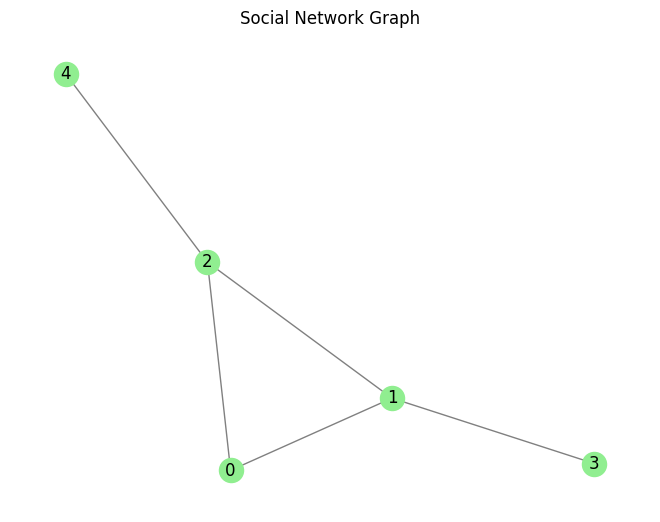

In [2]:
# Create a simple social network graph
G = nx.Graph()
G.add_edges_from([(0, 1), (0, 2), (1, 2), (1, 3), (2, 4)])

# Draw the graph
nx.draw(G, with_labels=True, node_color='lightgreen', edge_color='gray')
plt.title("Social Network Graph")
plt.show()

### Degree Centrality

The degree of a node is the number of connections it has. For undirected graphs, this is simply the number of neighbors.

In [3]:
# Degree of each node
degrees = dict(G.degree())
print("Node Degrees:", degrees)

Node Degrees: {0: 2, 1: 3, 2: 3, 3: 1, 4: 1}


### Adjacency and Laplacian Matrices

We now compute the adjacency matrix and Laplacian matrix of the graph.

In [4]:
A = nx.adjacency_matrix(G).todense()
D = np.diag([d for n, d in G.degree()])
L = D - A

print("Adjacency Matrix A:\n", A)
print("\nDegree Matrix D:\n", D)
print("\nLaplacian Matrix L = D - A:\n", L)

Adjacency Matrix A:
 [[0 1 1 0 0]
 [1 0 1 1 0]
 [1 1 0 0 1]
 [0 1 0 0 0]
 [0 0 1 0 0]]

Degree Matrix D:
 [[2 0 0 0 0]
 [0 3 0 0 0]
 [0 0 3 0 0]
 [0 0 0 1 0]
 [0 0 0 0 1]]

Laplacian Matrix L = D - A:
 [[ 2 -1 -1  0  0]
 [-1  3 -1 -1  0]
 [-1 -1  3  0 -1]
 [ 0 -1  0  1  0]
 [ 0  0 -1  0  1]]


### Eigenvalues of Laplacian

The smallest eigenvalue is always 0, and the number of zero eigenvalues tells us the number of connected components in the graph. The second smallest eigenvalue (algebraic connectivity) is used in graph partitioning.


In [5]:
from numpy.linalg import eigvals

lap_eigvals = np.sort(eigvals(L))
print("Eigenvalues of Laplacian:\n", np.round(lap_eigvals, 3))

Eigenvalues of Laplacian:
 [0.    0.697 1.382 3.618 4.303]


This concludes our basic network analysis using Laplacian matrices. We now have insight into the graph structure, node influence, and overall connectivity.

## 4.2 Spectral Graph Bipartitioning

We now use the Laplacian matrix to partition the graph into two clusters such that the number of edges between clusters is minimized.
This process uses the **Fiedler vector**, which corresponds to the second smallest eigenvalue of the Laplacian matrix.

Fiedler Vector:
 [-0.    -0.205  0.205 -0.677  0.677]
Node Partitioning:
 [0, 0, 1, 0, 1]


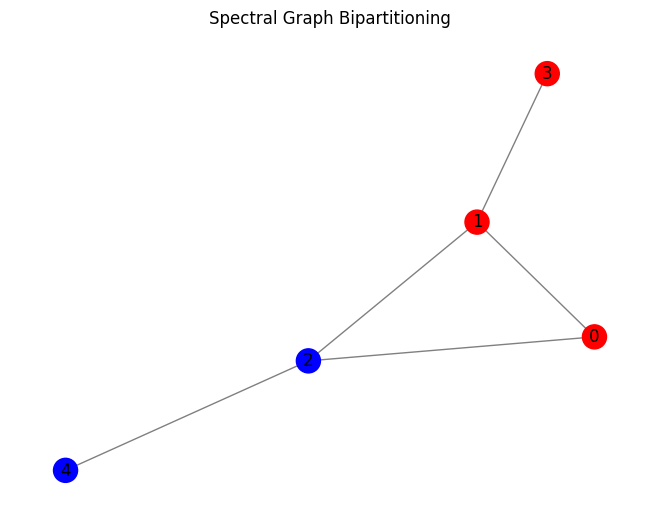

In [6]:
# Reuse the graph from 4.1
vals, vecs = np.linalg.eig(L)
idx = np.argsort(vals)
fiedler_vector = vecs[:, idx[1]]

print("Fiedler Vector:\n", np.round(fiedler_vector, 3))

# Partition based on sign of Fiedler vector
partition = [0 if val < 0 else 1 for val in fiedler_vector]
print("Node Partitioning:\n", partition)

# Visualize partition
color_map = ['red' if p == 0 else 'blue' for p in partition]
nx.draw(G, with_labels=True, node_color=color_map, edge_color='gray')
plt.title("Spectral Graph Bipartitioning")
plt.show()

The spectral bipartitioning method ensures that the **cut** (number of edges between clusters) is minimized and clusters are balanced.
This approach is based on minimizing the Rayleigh quotient:

$$ \min_{x \perp e} \frac{x^T L x}{x^T x} $$

The solution is the eigenvector corresponding to the second smallest eigenvalue of the Laplacian.

This method has broad applications in image segmentation, community detection in social networks, and biological clustering.

## 1. Constructing a Simple Graph and Its Matrices

We begin with a simple undirected graph and compute its:
- Adjacency Matrix
- Degree Matrix
- Laplacian Matrix (L = D - A)

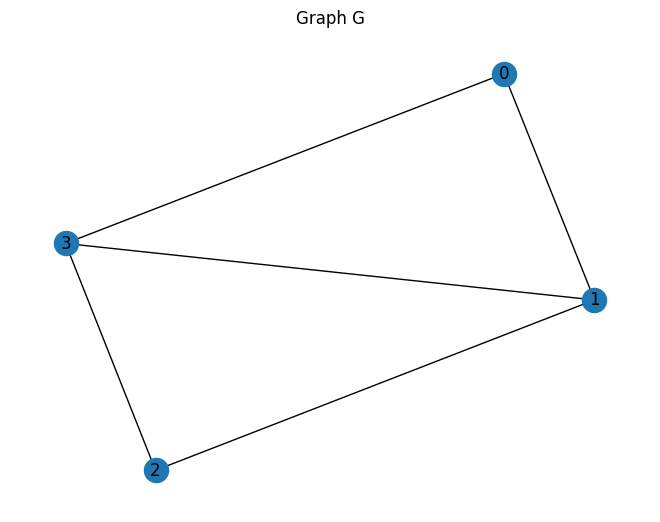

Adjacency Matrix A:
 [[0 1 0 1]
 [1 0 1 1]
 [0 1 0 1]
 [1 1 1 0]]

Degree Matrix D:
 [[2 0 0 0]
 [0 3 0 0]
 [0 0 2 0]
 [0 0 0 3]]

Unnormalized Laplacian Matrix L:
 [[ 2 -1  0 -1]
 [-1  3 -1 -1]
 [ 0 -1  2 -1]
 [-1 -1 -1  3]]


In [7]:
# Define a graph
G = nx.Graph()
G.add_edges_from([(0, 1), (1, 2), (2, 3), (3, 0), (1, 3)])

# Draw the graph
nx.draw(G, with_labels=True)
plt.title("Graph G")
plt.show()

# Adjacency matrix
A = nx.adjacency_matrix(G).todense()
print("Adjacency Matrix A:\n", A)

# Degree matrix
D = np.diag([d for n, d in G.degree()])
print("\nDegree Matrix D:\n", D)

# Laplacian matrix
L = D - A
print("\nUnnormalized Laplacian Matrix L:\n", L)

## 2. Normalized Laplacian Matrix

We compute the symmetric normalized Laplacian:

$$ L_{sym} = D^{-1/2} L D^{-1/2} $$

In [8]:
from scipy.linalg import fractional_matrix_power

D_inv_sqrt = fractional_matrix_power(D, -0.5)
L_sym = D_inv_sqrt @ L @ D_inv_sqrt
print("Symmetric Normalized Laplacian L_sym:\n", np.round(L_sym, 3))

Symmetric Normalized Laplacian L_sym:
 [[ 1.    -0.408  0.    -0.408]
 [-0.408  1.    -0.408 -0.333]
 [ 0.    -0.408  1.    -0.408]
 [-0.408 -0.333 -0.408  1.   ]]


## 3. Spectral Graph Partitioning

We use the second smallest eigenvector of the Laplacian matrix (Fiedler vector) to bipartition the graph.

Fiedler Vector:
 [ 7.07106781e-01 -2.75328192e-16 -7.07106781e-01  6.53216353e-18]
Partitioning of nodes:
 [1, 0, 0, 1]


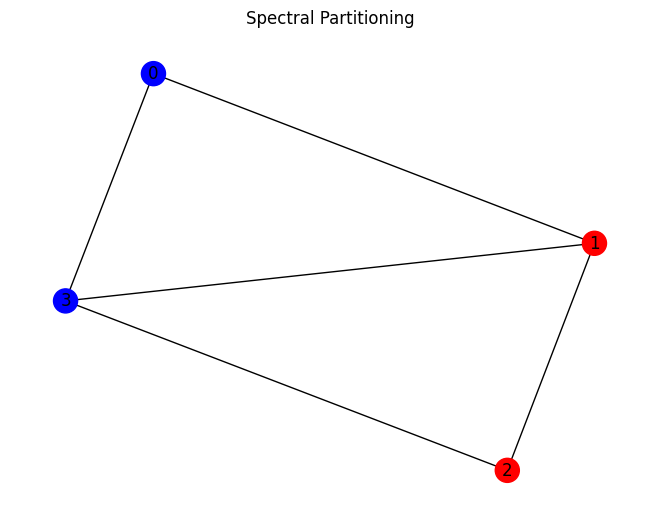

In [9]:
from numpy.linalg import eig

# Compute eigenvalues and eigenvectors
vals, vecs = eig(L)
idx = np.argsort(vals)
fiedler_vec = vecs[:, idx[1]]  # Second smallest eigenvalue
print("Fiedler Vector:\n", fiedler_vec)

# Partition graph
partition = [1 if val > 0 else 0 for val in fiedler_vec]
print("Partitioning of nodes:\n", partition)

# Visualize partition
colors = ['red' if p == 0 else 'blue' for p in partition]
nx.draw(G, with_labels=True, node_color=colors)
plt.title("Spectral Partitioning")
plt.show()

## 4. Diffusion on Graphs (Heat Equation)

We simulate heat diffusion over the graph using the Laplacian matrix. This illustrates how the Laplacian spreads values across the graph.

Heat distribution after time=1:
 [3.22 2.45 1.87 2.45]


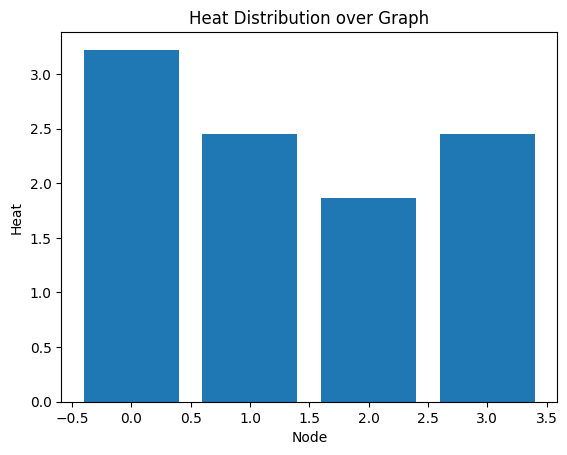

In [10]:
# Initial heat distribution
h0 = np.array([10, 0, 0, 0])  # Heat at node 0 only

# Exponential decay using Laplacian
from scipy.linalg import expm

time = 1.0
H = expm(-L * time) @ h0
print("Heat distribution after time=1:\n", np.round(H, 2))

plt.bar(range(len(H)), H)
plt.title("Heat Distribution over Graph")
plt.xlabel("Node")
plt.ylabel("Heat")
plt.show()

## Summary

- Laplacian matrices provide insight into graph structure and dynamics.
- Eigenvalues of the Laplacian reveal community structure.
- Graph diffusion processes use the Laplacian to simulate spreading phenomena.
- Spectral graph bipartitioning minimizes inter-cluster connections using the Fiedler vector.